In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones para que funcionen mis demas codigos xd 

In [2]:
# Funcion de la que me tomo mas tiempo hacerlo 
def gauss(a,b):
    '''Funcion que retorna un array "x" despues de hacer una eliminacion de Gauss con pivoteo'''
    
    n = a.shape[0]
    # https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.html
    # estamos creando un matriz columna 
    x = np.ndarray( shape=(n,1), dtype = np.float64 )   
    a_copy = a.copy() # con el fin de hacer segumiento a la matriz al final . 
    s = [] # lista para alojar los valores maximos (es parte del pivoteo)
    l = [] # usada para reordenar como se hara la eliminacion
    
    # #### LLENAMOS LA LISTA "S" CON LOS VALORES MAXIMOS  #######
    for i in range(0,n):
        l.append(i) # vamos agregando .Establecemos esta matriz
        smax = 0 # el maximo de una fila es importante para el pivote
        for j in range(0,n):
            # se escoje el maximo entre todos los elemnos de una fila
            smax = max(smax,abs(a[i][j])) 
            
        s.append(smax) # alojamos el maximo de la fila
    
    # ---------- print('l inicial ' ,l) (SEGUIMIENTO)
    # --------- print('s inicial ', s) (SEGUIMIENTO)
    
    # ##### PIVOTEO(ESCOJEMOS LA FILAS PIVOTES Y ELIMINAMOS) #########
    # k hace referencia a la columna donde se hara ceros seran creados en el array a_ij
    # Pero recuerda que los ceros no se crean realmente . Por que en esos espacios almacenamos 
    # otras cosas(los multiplicadorese para descomposicion LU) . 
    for k in range(0,n-1):
        
        rmax = 0 
        # ##### SE ESCOJE LA FILA PIVOTE EN ESTE BLOQUE #########
        for i in range (k,n):
            
            # esto es para escoger la correcta fila pivote
            # se esta dividiendo (elemnto de columna k y fila [k-n][k])/los Smax
            r = abs( a[l[i]][k] / s[l[i]] )
            if (r > rmax):
                # j = i es para escoger el correcto pivote
                # rmax = r es para escoger la maxima proporcion(ratio)
                rmax,j = r,i
                # al final no usaremos rmax , solo es necesario para detener el if cuando sea necesario
              
        l[j],l[k] = l[k],l[j] # luego se cambia el lugar donde ocurre el maximo proporcion
        
        
        # ####### ELIMINACION GAUSSIANA PERO LA FILA PIVOTE LO DETERMINA "l" ################## 
        for i in range(k+1,n):
            xmult = a[l[i]][k]/a[l[k]][k]
            a[l[i]][k] = xmult # los guardo para fines de LU y para eliminar "b"
            
            a_copy[l[i]][k] -= xmult*a[l[k]][k] # para hacer segumiento(se puede borrar) 
            
            # este for hara segumiento de que se haga operaciones en toda la fila que no es pivot
            for j in range(k+1,n):
                a[l[i]][j] -= xmult*a[l[k]][j]
                a_copy[l[i]][j] -= xmult*a[l[k]][j] # para hacer seguimiento(se puede borrar)
    
    # --------- print('l final ' ,l) (SEGUIMIENTO)
    # --------- print('a final copy \n' , a_copy) (SEGUIMIENTO)
    # ##### SEGIMOS PIVOTEANDO PERO PARA LA MATRIZ b###   
    for k in range(0,n-1):
        
        # recuerda el que ahora maneja el orden sera la lista "l"
        # debemos hacer las operaciones en el mismo orden que hemos hecho para "a"
        for i in range(k+1,n):
            b[l[i]] -= a[l[i]][k]*b[l[k]]
            
    #------ print('b final \n ' , b) (SEGUIMIENTO)
    
    # ######### AHORA HACEMOS LA SUSTITUCION BACKWARD ##########
    
    # espero se entienda por que -1 . Es por la cuenta por cero
    x[n-1] = b[l[n-1]]/a[l[n-1]][n-1]
    
    for i in range(n-2,-1,-1):
        summ = b[l[i]]
        for j in range(i+1,n):
            summ -= a[l[i]][j]*x[j]
            
        x[i] = summ/a[l[i]][i]
        
        
    return x

# Aca implementare el metodo de Euler simple

In [3]:
def euler(f,t0=0,x0=0,limsup=0,n=100):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion 
    - n = numero de pasos
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    h = (limsup-t0)/n
    t = t0
    x = x0
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for k in range(0,n):
        x = x + h*f(t,x)
        t = t + h
        cal_valores.append(x)
        valores_t.append(t)
    
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
        
    return np.array(lista_resultados)    

In [4]:
# Probamos nuestra funcion si funciona xd 
def funcion1prueba(t,x):
    return np.float64(1+x**2+t**3)

lista = euler(f=funcion1prueba,t0=1,x0=-4,limsup=2,n=5)
lista # x(2) aprox 4.2358...

array([[ 1.        ,  1.2       ,  1.4       ,  1.6       ,  1.8       ,
         2.        ],
       [-4.        , -0.4       ,  0.1776    ,  0.93270835,  2.12589733,
         4.39618521]])

In [5]:
np.linspace(0,1,4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

# Aca implementare el metodo de HEUN simple con iteracion

<img src="pseudocodigo_eq_dife.png">

In [6]:
def suma(a=10,b=20):
    return a/b

In [7]:
def heun(f,t0=0,x0=0,limsup=0,n=100,error=10**(-3)):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion 
    - n = numero de pasos
    - error = es el error para que se detenga las iteraciones en heun del corrector
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    
    h = (limsup-t0)/n
    t = t0
    x = x0 
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for k in range(0,n):
        error_iter = error
        maximo = 0 # para controlar el while 
        xe = x + h*f(t,x) # // predictor (fase intermedia)
        
        # con el while hacemos la correccion hasta tener una convergencia
        while(error_iter >= error and maximo < 20 ):
            x_old = xe
            xe = x + (f(t,x)+f(t+h,xe))/2 * h  # // corrector
            error_iter = abs((xe-x_old)/xe*100)
            maximo += 1 # este es para evitar que el programa se cuelgue 
        
        x = xe # si no pones esto , (vas a tener muchos problemas)
        t = t + h
        cal_valores.append(xe)
        valores_t.append(t)
    
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
        
    return np.array(lista_resultados) 

In [8]:
# probemos si funciona
def funcion2prueba(t,x):
    return np.float64(4*np.e**(0.8*t)-0.5*x)

lista = heun(f=funcion2prueba,t0=0,x0=2,limsup=1,n=1,error=10**(-3))
lista # x(1) real 6.1946314

array([[0.        , 1.        ],
       [2.        , 6.36087068]])

# Aca aplicare metodo del punto medio

<img src="punto_medio.png">

In [9]:
def midpoint(f,t0=0,x0=0,limsup=0,n=100):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion 
    - n = numero de pasos
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    
    h = (limsup-t0)/n
    t = t0
    x = x0 
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for k in range(0,n):
        xe = x + h/2*f(t,x)
        x = x + h*f(t+h/2,xe)
        t = t + h
        cal_valores.append(x)
        valores_t.append(t)
        
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
        
    return np.array(lista_resultados)  

In [10]:
# probemos si nuestro codigo funciona
# probemos si funciona
def funcion2prueba(t,x):
    return np.float64(4*np.e**(0.8*t)-0.5*x)

lista = midpoint(f=funcion2prueba,t0=0,x0=2,limsup=1,n=1)
lista # x(1) real 6.1946314

array([[0.        , 1.        ],
       [2.        , 6.21729879]])

# Runge kutta

<img src="RK4.png">
<img src="RK4_and_RK3.png">

In [11]:
# implemento runge kuta 4
def RK4(f=None,t0=0,x0=0,limsup=0,n=10):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion
    - n = numero de pasos
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    h = (limsup-t0)/n
    t = t0
    x = x0
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for i in range(0,n):
        k1 = h*f(t,x)
        k2 = h*f(t+1/2*h,x+1/2*k1)
        k3 = h*f(t+1/2*h,x+1/2*k2)
        k4 = h*f(t+h,x+k3)
        x = x + 1/6*(k1+2*k2+2*k3+k4)
        t = t0 + (i+1)*h
        cal_valores.append(x)
        valores_t.append(t)
        
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
    return lista_resultados

# implemento runge kuta 3
def RK3(f=None,t0=0,x0=0,limsup=0,n=10):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion
    - n = numero de pasos
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    h = (limsup-t0)/n
    t = t0
    x = x0
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for i in range(0,n):
        k1 = h*f(t,x)
        k2 = h*f(t+1/2*h,x+1/2*k1)
        k3 = h*f(t+h,x-k1+2*k2)
        x = x + 1/6*(k1+4*k2+k3)
        t = t0 + (i+1)*h
        cal_valores.append(x)
        valores_t.append(t)
    
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
    return lista_resultados

In [12]:
# probamos si funciona
def funcion2prueba(t,x):
    return np.float64(4*np.e**(0.8*t)-0.5*x)

lista1 = RK4(f=funcion2prueba,t0=0,x0=2,limsup=1,n=2)
lista2 = RK3(f=funcion2prueba,t0=0,x0=2,limsup=1,n=2)
lista1,lista2 # x(1) real 6.1946314

(array([[0.        , 0.5       , 1.        ],
        [2.        , 3.7516995 , 6.19504199]]),
 array([[0.        , 0.5       , 1.        ],
        [2.        , 3.75036978, 6.1918979 ]]))

<img src="RK2.png">

In [13]:
# implemento runge kuta 3
def RK2_ralston(f=None,t0=0,x0=0,limsup=0,n=10):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0 = condicion inicial (valor inicial)
    - limsup = hasta donde se quiere hacer la prediccion
    - n = numero de pasos
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    h = (limsup-t0)/n
    t = t0
    x = x0
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for i in range(0,n):
        k1 = f(t,x)
        k2 = f(t+3/4*h,x+3/4*k1*h)
        x = x + 1/3*(k1+2*k2)*h
        t = t0 + (i+1)*h
        cal_valores.append(x)
        valores_t.append(t)
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
    return lista_resultados

In [14]:
# probamos si funciona
def funcion2prueba(t,x):
    return np.float64(4*np.e**(0.8*t)-0.5*x)

lista = RK2_ralston(f=funcion2prueba,t0=0,x0=2,limsup=1,n=4)
lista # x(1) real 6.1946314

array([[0.        , 0.25      , 0.5       , 0.75      , 1.        ],
       [2.        , 2.8110145 , 3.75844035, 4.87753599, 6.21077359]])

# Resolvemos el problema de la derivada dejado por el profesor

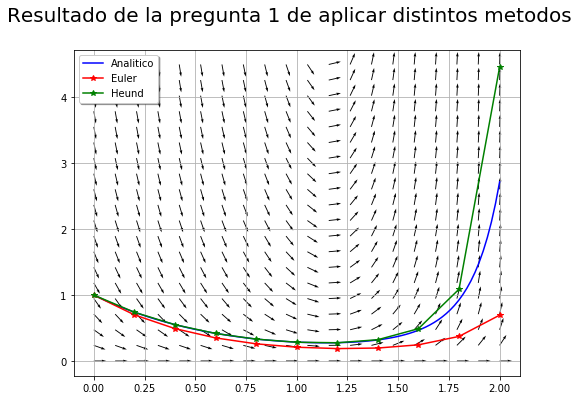

In [15]:
print("//////////////////////// Ejercicio 1 ///////////////////")
# Problema a resolver 
# dy/dx = y*t**(3)-1.5*y con y(0)=1 , resolver en el intervalor [0,2]
Pasos = 10
def diff1(t,y):
    return np.float64(y*t**(3)-1.5*y)

# la funcion "y" analitica es:
def funcion_resuelta(t):
    return np.float64(np.e**( (t**4)/4-1.5*t ) )

# creamos el lugar donde graficaremos
# fig es la figura y axes son los ejes (son elementos de cada figura)
fig, axes = plt.subplots(nrows=1,ncols=1 , figsize = (8,6)) 
# graficamos el analitico
x = np.linspace(0,2,100)
axes.plot(x,funcion_resuelta(x),'b',label="Analitico")

# resolvemos el problema con el metodo de euler
solucion_euler = euler(f=diff1,t0=0,x0=1,limsup=2,n=Pasos)
axes.plot(solucion_euler[0],solucion_euler[1],'r-*',label="Euler")

# resolvemos el problema con el metodo de heund
solucion_heund = heun(f=diff1,t0=0,x0=1,limsup=2,n=Pasos,error=10**(-3))
axes.plot(solucion_heund[0],solucion_heund[1],'g-*',label="Heund")

# resolvemos el problema con el metodo de ralston
solucion_ralston = RK2_ralston(f=diff1,t0=0,x0=1,limsup=2,n=Pasos)
# axes.plot(solucion_ralston[0],solucion_ralston[1],'m-*',label="ralston")

# resolvemos el problema con el metodo de RK4
solucion_RK4 = RK4(f=diff1,t0=0,x0=1,limsup=2,n=Pasos)
# axes.plot(solucion_RK4[0],solucion_RK4[1],'k-*',label="ralston")

# grafiquemos el campo de pendientes
eje_x = np.linspace(0, 2, 20)
eje_y = np.linspace(0, 4.5, 20)
## para entender como funciona meshgrid 
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
X,Y  = np.meshgrid(eje_x, eje_y)
tangentes = diff1(X,Y)
proyeccion_y = np.sin(np.arctan(tangentes))
proyeccion_x = np.cos(np.arctan(tangentes))
axes.quiver(X, Y, proyeccion_x, proyeccion_y,width=0.002,color="k")


# añadidos de imagen
axes.grid(True)
axes.legend( loc='upper left', shadow=True) 
fig.suptitle('Resultado de la pregunta 1 de aplicar distintos metodos', fontsize=20)

plt.show()


# Sistemas de ecuaciones lineales

<img src="RK4system.png">

In [16]:
def RK4_system(F=None,t0=0,X0=0,limsup=0,nstep=10):
    '''
    Funcion que recibe como argumentos 
    - F = funcion de Rn+1-> Rn F(X,t)
    - t0,X0 = condicion inicial (valor inicial) X0 es una matriz columna de orden "n"
    - limsup = hasta donde se quiere hacer la prediccion
    - nstep = numero de pasos
    Y restorna un array de n+1 dimensiones , donde en cada fila el primer elemento es el tiempo y los restantes son los valores predichos en ese tiempo
    Si se desea tener por columnas podrias usar retornar la transpuesta de la matriz (OJO) . 
    '''
    h = (limsup-t0)/nstep
    t = t0
    X = np.array(X0,dtype=np.float64)
    # https://numpy.org/doc/stable/reference/generated/numpy.insert.html ( documentacion )
    valor_inicio = np.insert(X,0,t) # lo que hace es crear una copia de X y aumentarle al inicio el "t" 
    cal_valores = []
    cal_valores.append(valor_inicio) # agregamos la parte inicial 
    for i in range(0,nstep):
        K1 = F(t,X)
        K2 = F(t+1/2*h,X+1/2*K1*h)
        K3 = F(t+1/2*h,X+1/2*K2*h)
        K4 = F(t+1/2*h,X+ K3*h)
        t = t0 + (i+1)*h
        X = X + 1/6*(K1+ 2*K2+ 2*K3 + K4)*h
        valor_calculado = np.insert(X,0,t) # lo que hace es crear una copia de X y aumentarle al inicio el "t" 
        cal_valores.append(valor_calculado) # agregamos la parte inicial 
        
    lista_resultados = np.array(cal_valores,dtype=np.float64)
    return lista_resultados # aca puedes retornar esto o su transpuesta

In [17]:
# Probemos nuestra funcion 
def Funcionprueba(t,X):
    diffx = X[0] - X[1] + 2*t - t**2- t**3
    diffy = X[0] + X[1] - 4*t**2 + t**3 
    return np.array([diffx,diffy],dtype=np.float64)

respuesta = RK4_system(F=Funcionprueba,t0=0,X0=np.array([1,0]),limsup=1,nstep=10)
respuesta 

array([[0.        , 1.        , 0.        ],
       [0.1       , 1.10812373, 0.10981831],
       [0.2       , 1.23402758, 0.23611003],
       [0.3       , 1.37506076, 0.3748197 ],
       [0.4       , 1.52809382, 0.52179317],
       [0.5       , 1.68948175, 0.67271496],
       [0.6       , 1.85503049, 0.82303526],
       [0.7       , 2.01996803, 0.96788605],
       [0.8       , 2.17892194, 1.10198559],
       [0.9       , 2.32590516, 1.21953096],
       [1.        , 2.4543123 , 1.31407829]])

# Aca implementare Euler implicito y explicito para sistema de ecuaciones diferenciales

### La forma implicita y explicita
aca resolvere un tipo de ecuaciones lineales con euler implicito
$$ Y' = AY $$
donde $A$ es un matriz constante y $Y$ es $[y1,y2,y3,y4....]$ . Luego el metodo de euler implicito involucra
$$ Y_{i+1} = Y_{i} + Y'_{i+1}\cdot h $$
$$ Y_{i+1} = Y_{i} + AY_{i+1}\cdot h $$
Finalmente el sistema iterativo para **euler implicito** queda como 
$$ \left( I - A h \right) Y_{i+1} = Y_i $$
En cammbio para **euler explicito** tenemos
$$ \left( I + A h \right) Y_{i} = Y_{i+1} $$

In [18]:
# Metodo de Euler implicito 
def euler_implicito(A=None,Yi0=None,t0=0,limsup=0,n=100):
    '''
    Funcion que recibe como argumentos
    - A = matriz para el problema de Y' = AY a resolver
    - t0,Yi0 = condiciones iniciales, Yi0 es un array fila de orden "n"
    - limsup = hasta donde se quiere hacer la prediccion 
    - n = numero de pasos 
    Y restorna un array de n+1 dimensiones , donde en cada fila el primer elemento es el tiempo y los restantes son los valores predichos en ese tiempo
    Si se desea tener por columnas podrias usar retornar la transpuesta de la matriz (OJO) .
    '''
    # armamos la condicion inicial 
    h = (limsup-t0)/n
    t = t0
    Y = np.array(Yi0,dtype=np.float64)
    # https://numpy.org/doc/stable/reference/generated/numpy.insert.html ( documentacion )
    valor_inicio = np.insert(Y,0,t) # lo que hace es crear una copia de X y aumentarle al inicio el "t" 
    cal_valores = []
    cal_valores.append(valor_inicio) # agregamos la parte inicial 
    
    # armamos la matriz que se usara en la relacion de recurrencia (I-Ah)Y_i+1 = Y_i
    orden = A.shape[1] # nos da el orden de la matriz cuadrada
    # https://numpy.org/doc/stable/reference/generated/numpy.identity.html
    I = np.identity(orden , dtype=np.float64)
    B = I- A*h # la matriz para la recurrencia 
    
    # hacemos la recurrencia
    for i in range(0,n):
        # recuerda que se devuelve una matriz columan y lo que quieres es matriz fila por eso el T ( transpuesta)
        Y = gauss(B.copy(),Y.T).T 
        t = t0 + (i+1)*h 
        # OJO ( [[1,3]] es lo mimso [1,3] para numpy . Haz la prueba y veras )
        valor_calculado = np.insert(Y,0,t) # lo que hace es crear una copia de X y aumentarle al inicio el "t" 
        cal_valores.append(valor_calculado) # agregamos la parte inicial
    
    lista_resultados = np.array(cal_valores,dtype=np.float64)
    return lista_resultados # aca puedes retornar esto o su transpuesta


# # Metodo de Euler explicito 
def euler_explicito(A=None,Yi0=None,t0=0,limsup=0,n=100):
    '''
    Funcion que recibe como argumentos
    - A = matriz para el problema de Y' = AY a resolver
    - t0,Yi0 = condiciones iniciales, Yi0 es un array fila de orden "n"
    - limsup = hasta donde se quiere hacer la prediccion 
    - n = numero de pasos 
    Y restorna un array de n+1 dimensiones , donde en cada fila el primer elemento es el tiempo y los restantes son los valores predichos en ese tiempo
    Si se desea tener por columnas podrias usar retornar la transpuesta de la matriz (OJO) .
    '''
    # armamos la condicion inicial 
    h = (limsup-t0)/n
    t = t0
    Y = np.array(Yi0,dtype=np.float64)
    # https://numpy.org/doc/stable/reference/generated/numpy.insert.html ( documentacion )
    valor_inicio = np.insert(Y,0,t) # lo que hace es crear una copia de X y aumentarle al inicio el "t" 
    cal_valores = []
    cal_valores.append(valor_inicio) # agregamos la parte inicial 
    
    # armamos la matriz que se usara en la relacion de recurrencia (I-Ah)Y_i+1 = Y_i
    orden = A.shape[1] # nos da el orden de la matriz cuadrada
    # https://numpy.org/doc/stable/reference/generated/numpy.identity.html
    I = np.identity(orden , dtype=np.float64)
    B = I + A*h # la matriz para la recurrencia 
    
    # hacemos la relacion de recurrencia
    for i in range(0,n):
        # recuerda que se devuelve una matriz columan y lo que quieres es matriz fila por eso el T ( transpuesta)
        Y = (B.dot(Y.T)).T
        t = t0 + (i+1)*h 
        # OJO ( [[1,3]] es lo mimso [1,3] para numpy . Haz la prueba y veras )
        valor_calculado = np.insert(Y,0,t) # lo que hace es crear una copia de X y aumentarle al inicio el "t" 
        cal_valores.append(valor_calculado) # agregamos la parte inicial
    
    lista_resultados = np.array(cal_valores,dtype=np.float64)
    return lista_resultados # aca puedes retornar esto o su transpuesta

# veamos si funciona nuestro codigo 
<img src="ejercicio_euler_implicito.png">

### La solucion teorica 
$$ \begin{equation}
\begin{pmatrix}
X_1' \\ 
x_2' 
\end{pmatrix} =
\begin{pmatrix}
999 & 1999 \\
-1000 & -2000 
\end{pmatrix} 
\begin{pmatrix}
X_1 \\ 
X_2 
\end{pmatrix}
\end{equation} $$
Es de la forma $x_1 = Ae^{mt}$ , $x_2 = Be^{mt}$ donde m esta dado por 
$$ m^2 - (999 -2000)m + ( (999) \cdot (-2000) - (1999)\cdot (-1000) ) = 0 $$

In [19]:
# usare simpy x1 = x y x2 = y
from sympy import *
t = symbols('t')
x, y = symbols('x, y', cls=Function)
eq = (Eq(Derivative(x(t),t), 999*x(t) + 1999*y(t)), Eq(Derivative(y(t),t), -1000*x(t) + -2000*y(t)))
ics = {x(0): 1, y(0): 1}
resuelto = dsolve(eq,ics=ics)
resuelto

[Eq(x(t), 3998*exp(-t)/999 - 2999*exp(-1000*t)/999),
 Eq(y(t), -2000*exp(-t)/999 + 2999*exp(-1000*t)/999)]

In [20]:
# solucion de x(t)
x1 = resuelto[0]
x1

Eq(x(t), 3998*exp(-t)/999 - 2999*exp(-1000*t)/999)

In [21]:
# solucion de y(t)
x2 = resuelto[1]
x2

Eq(y(t), -2000*exp(-t)/999 + 2999*exp(-1000*t)/999)

In [1]:
0.2/100


0.002

In [22]:
print("/////////////// Ejercicio 2 /////////////////////")

MatrizA = np.array([[999,1999],[-1000,-2000]],dtype=np.float64)
# euler implicito 
resultado1 = euler_implicito(A=MatrizA,Yi0=np.array([1,1]),t0=0,limsup=0.2,n=100)
# euler explicito 
resultado2 = euler_explicito(A=MatrizA,Yi0=np.array([1,1]),t0=0,limsup=0.2,n=100)

# aplicando runge kutta 
# Probemos nuestra funcion 
def Funcionproblema(t,X):
    x1 = X[0]
    x2 = X[1]
    diffx1 = 999*x1 + 1999*x2
    diffx2 = -1000*x1 - 2000*x2  
    return np.array([diffx1,diffx2],dtype=np.float64)

resultado3 = RK4_system(F=Funcionproblema,t0=0,X0=np.array([1,1]),limsup=0.2,nstep=4)

# solucion real calculado magicamente 
def solx(t):
    return np.float64( 3998/999*np.e**(-t) - 2999/999*np.e**(-1000*t))
def soly(t):
    return np.float64( -2000/999*np.e**(-t) + 2999/999*np.e**(-1000*t))
resultado1, resultado2,resultado3,solx(0.2),soly(0.2)

(array([[ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 2.00000000e-03,  2.99334664e+00, -9.97338656e-01],
        [ 4.00000000e-03,  3.65248611e+00, -1.66046218e+00],
        [ 6.00000000e-03,  3.86690046e+00, -1.87885262e+00],
        [ 8.00000000e-03,  3.93308367e+00, -1.94900399e+00],
        [ 1.00000000e-02,  3.94986707e+00, -1.96974763e+00],
        [ 1.20000000e-02,  3.95019439e+00, -1.97402728e+00],
        [ 1.40000000e-02,  3.94504686e+00, -1.97282420e+00],
        [ 1.60000000e-02,  3.93808488e+00, -1.96979879e+00],
        [ 1.80000000e-02,  3.93052856e+00, -1.96617118e+00],
        [ 2.00000000e-02,  3.92278457e+00, -1.96234806e+00],
        [ 2.20000000e-02,  3.91498845e+00, -1.95846499e+00],
        [ 2.40000000e-02,  3.90718536e+00, -1.95456714e+00],
        [ 2.60000000e-02,  3.89939034e+00, -1.95066957e+00],
        [ 2.80000000e-02,  3.89160838e+00, -1.94677727e+00],
        [ 3.00000000e-02,  3.88384112e+00, -1.94289190e+00],
        [ 3.20000000e-02

# Graficamos para ver mejor la solucion

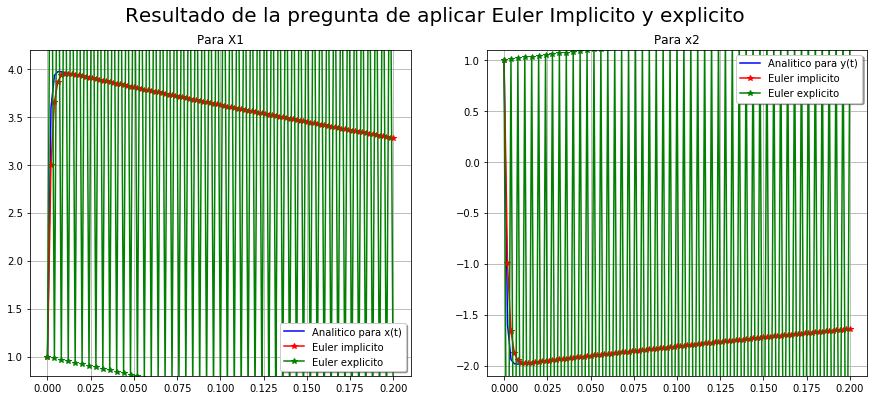

In [23]:
# creamos el lugar donde graficaremos
# fig es la figura y axes son los ejes (son elementos de cada figura)
fig, axes = plt.subplots(nrows=1,ncols=2 , figsize = (15,6)) 
# graficamos el analitico
x = np.linspace(0,0.2,100)

# para X1 
axes[0].plot(x,solx(x),'b',label="Analitico para x(t)")
axes[0].plot(resultado1.T[0],resultado1.T[1],'r-*',label="Euler implicito")
axes[0].plot(resultado2.T[0],resultado2.T[1],'g-*',label="Euler explicito")
axes[0].set_ylim(0.8,4.2)
axes[0].set_title('Para X1')
axes[0].grid(True)
axes[0].legend( loc='lower right', shadow=True) 


axes[1].plot(x,soly(x),'b',label="Analitico para y(t)")
axes[1].plot(resultado1.T[0],resultado1.T[2],'r-*',label="Euler implicito")
axes[1].plot(resultado2.T[0],resultado2.T[2],'g-*',label="Euler explicito")
axes[1].set_ylim(-2.1,1.1)
axes[1].set_title('Para x2')
axes[1].grid(True)
axes[1].legend( loc='upper right', shadow=True) 
# añadidos de imagen


fig.suptitle('Resultado de la pregunta de aplicar Euler Implicito y explicito', fontsize=20)
plt.show()

# Aca implementare heun modificado 

In [24]:
def heun_modificado(f,t0=0,x0=0,x1=0,limsup=0,n=100,error=10**(-3)):
    '''
    Funcion que recibe como argumentos 
    - f = funcion de R2-> R 
    - t0,x0,xant0 = condicion inicial (valor inicial) , x0 y x1 son los que se necesita para este metodo multipaso
    - limsup = hasta donde se quiere hacer la prediccion 
    - n = numero de pasos
    - error = es el error para que se detenga las iteraciones en heun del corrector
    Y restorna un array de dos dimensiones , donde en la primera esta el dominio y la segunda es el rango predicho 
    '''
    
    h = (limsup-t0)/n
    t = t0
    xant = x0
    x = x1
    cal_valores = [] # rango predicho
    valores_t = [] # dominio donde se predice
    cal_valores.append(x)
    valores_t.append(t)
    for k in range(0,n):
        error_iter = error
        maximo = 0 # para controlar el while 
        xe = xant + 2*h*f(t,x) # // predictor (fase intermedia)
        xant = x # como ya usamos el x ahora se convierte en xant , a partir de aca cambia el x ( por eso es apropiado hace aca el cambio)
        
        # con el while hacemos la correccion hasta tener una convergencia
        while(error_iter >= error and maximo < 15 ):
            x_old = xe
            xe = x + (f(t,x)+f(t+h,xe))/2 * h  # // corrector
            error_iter = abs((xe-x_old)/xe*100)
            maximo += 1 # este es para evitar que el programa se cuelgue 
        
        x = xe # es importante que pongas esto , si no lo pones tendras cosas raras
        t = t + h
        cal_valores.append(xe)
        valores_t.append(t)
    
    lista_resultados = np.array([valores_t,cal_valores],dtype=np.float64)
        
    return np.array(lista_resultados)


# Aplicamos al problema que dejo el profe

In [25]:
# hallamos la solucion analitica
# usare simpy 
from sympy import *
t = symbols('t')
x = symbols('x', cls=Function)
eq = Eq(Derivative(x(t),t),-0.5*x(t)+exp(-t))
ics = {x(2): 4.143883}
resuelto = dsolve(eq,ics=ics)
resuelto # solucion analitica

Eq(x(t), (12.0000007405032 - 2.0*exp(-0.5*t))*exp(-0.5*t))

In [26]:
# probemos si funciona
def diffx(t,x):
    return np.float64(-0.5*x+np.e**(-t))

resultado4 = heun_modificado(f=diffx,t0=2,x0=5.222138,x1=4.143883,limsup=3,n=2,error=10**(-5))

# solucion real 
def solxreal(t):
    return np.float64( ( 12.0000007405032-2.0*np.e**(-0.5*t) )*np.e**(-0.5*t) )

# comprobamos 
resultado4 , solxreal(2) 

(array([[2.        , 2.5       , 3.        ],
        [4.143883  , 3.27133572, 2.57367712]]),
 4.1438829999999856)

# Visualizamos graficamente

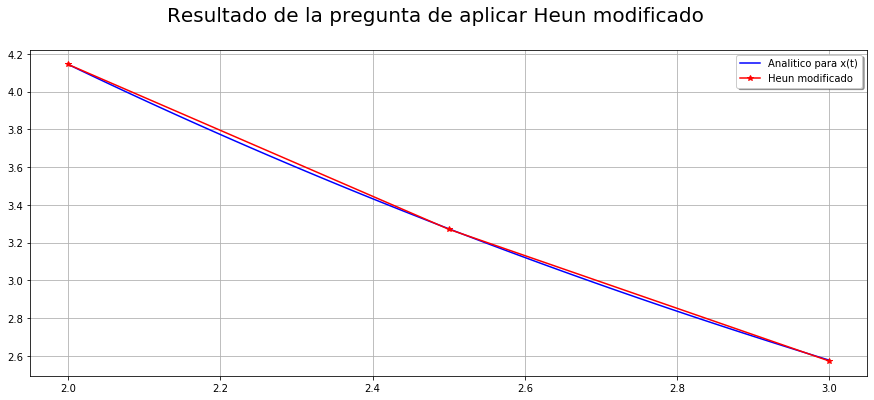

In [27]:
# creamos el lugar donde graficaremos
# fig es la figura y axes son los ejes (son elementos de cada figura)
fig, axes = plt.subplots(nrows=1,ncols=1 , figsize = (15,6)) 
# graficamos el analitico
x = np.linspace(2,3,100)
# para X1 
axes.plot(x,solxreal(x),'b',label="Analitico para x(t)")
axes.plot(resultado4[0],resultado4[1],'r-*',label="Heun modificado")
axes.grid(True)
axes.legend( loc='upper right', shadow=True) 

fig.suptitle('Resultado de la pregunta de aplicar Heun modificado', fontsize=20)
plt.show()